In this mini project, we will use `Background Subtraction in Dynamic DataSet` from `Statistical Visual Computing Laboratory (SVCL)` at UCSD to experiment data to remove objects other than the street from several security videos using `Singular Value Decomposition` to help test their vision system.


** This exercise is a replicate version from IBM Unsupervised learning Hands-on project.**

In [3]:
import skillsnetwork
# print(skillsnetwork.read.__doc__)
# print(dir(skillsnetwork))
base_path = "E:\\Python\\2024_machine_learning_projects\\introduction\\SVD"
path="E:\\Python\\2024_machine_learning_projects\\introduction\\SVD\\traffic.tar.gz"
await skillsnetwork.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/traffic.tar.gz", path=base_path)
await skillsnetwork.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/peds.tar.gz", path=base_path)
await skillsnetwork.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/boats.tar.gz", path=base_path)


ModuleNotFoundError: No module named 'skillsnetwork'

In [65]:
import pandas as pd
import numpy as np 


from os import listdir,getcwd
from os.path import isfile, join
from random import randint
from PIL import Image

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv,svd
init_printing()

In [66]:
import tarfile
import os

def extract_tar_gz(file_path, extract_path='.'):
    """ Extract a .tar.gz file to the specified directory.
     Params:
     file_path (str) : the path to the .tar.gz file.
     extract_path (str): The directory where files should be extracted. Default is the current directory.
    """
    try:
        with tarfile.open(file_path, 'r:gz') as tar:
            tar.extractall(path=extract_path)
        print(f"Extracted {file_path} to {extract_path}")
    except Exception as e:
        print(f"An error occured: {e}")

list_tar_files = [os.path.join(os.getcwd(), f) for f in os.listdir() if "tar" in f.split(".")[1]]

for tar_file in list_tar_files:
    extract_tar_gz(tar_file)



Extracted e:\Python\2024_machine_learning_projects\introduction\SVD\boats.tar.gz to .
Extracted e:\Python\2024_machine_learning_projects\introduction\SVD\peds.tar.gz to .
Extracted e:\Python\2024_machine_learning_projects\introduction\SVD\traffic.tar.gz to .


### Defining a helper function to get the data from the matrix.

In [62]:
def get_data_Matrix (mypath="peds"):
    cwd = getcwd()

    mypath=join(cwd,mypath)
    files = [ join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    # Read image
    img = Image.open(files[0])
    I=np.array(img)
    # Output Images

    Length,Width=I.shape
   
    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file)
        I=np.array(img)
        X[i,:]=I.reshape(1,-1)
    return X,Length,Width

## Singular Value Decomposition
The Singular-Value Decomposition, or SVD for short, will decompose a real or complex $N × D$ matrix $\mathbf{X}$ of rank $r$ as follows:


$$\mathbf{X}= \mathbf {US V^{T}}$$


In many applications  $N \ge D$, but SVD can be used for any matrix $\mathbf{X}$. For example, in computer vision and image processing tasks we sometimes have $D \ge N$.


The matrix $\mathbf{S}$ contains the nonnegative <b>singular values</b> of $\mathbf{X}$, with diagonal entries ${\sigma _{i}}$ else $0$, the entries are ordered by importance in descending order with respect to $i$, i.e:

$$\sigma _{1}>\sigma _{2},..>\sigma _{r}$$


The matrix $\mathbf {U}$ is $NxD$ and  has the orthornormal columns  $\mathbf{u}_{1}, ..., \mathbf{u}_{D} $ called the <b>left singular vectors</b>.

The matrix $\mathbf {V}$ is $DxD$ and has the orthornormal columns $\mathbf{v}_{1}, ..., \mathbf{v}_{D}$ called the <b>right singular vectors</b>  (note  that $\mathbf{V}$ transpose, $\mathbf {V^{T}}$ is returned as output in numpy's `svd` function).


 SVD decomposition returns the full shape of a non-square matrix, the non colored  parts of the decomposition **N-D** terms in the matrix U are zeros, we see many of the squares are redundant.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/matrix.png" width="600" alt="full svd">


Consider the matrix $\mathbf{X}$:


In [44]:
X=np.array([[1.0,2],[2,1],[3,3]])
Matrix(X)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

We can perform SVD on any matrix in numpy by using the function `svd` from `numpy.linalg`:

In [46]:
U, s, VT =svd(X, full_matrices=False)

When $\mathbf{X}$ is a 2D array, it is factorized as $U\times np.diag(s)\times V^T$, where $U$ and $V^T$ are 2D orthogonal  matrices  and $s$ is an 1D array of $\mathbf{X}$'s singular values. When $\mathbf{X}$ is higher-dimensional (such as sparse matrices), the parameter ```full_matrices=False```, the skinny SVD is used and the zero elements are dropped. This can be summarized in the following image:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/skinny-SVD.png" width="600" alt="skinnysvd">

We have the <b>left singular vectors</b> of $\mathbf{X}$:


In [48]:
Matrix(U)

⎡-0.408248290463863    0.707106781186548  ⎤
⎢                                         ⎥
⎢-0.408248290463863   -0.707106781186547  ⎥
⎢                                         ⎥
⎣-0.816496580927726  -1.57698996923239e-16⎦

We have the <b>singular values</b> of $\mathbf{X}$, as the output is an 1-D array we use the function ```np.diag``` to convert the output into a diagonal matrix:


In [49]:
S=np.diag(s)

Matrix(S)

⎡5.19615242270663  0.0⎤
⎢                     ⎥
⎣      0.0         1.0⎦

In [50]:
Matrix(VT)

⎡-0.707106781186547  -0.707106781186547⎤
⎢                                      ⎥
⎣-0.707106781186547  0.707106781186547 ⎦

We can reconstruct the matrix $\mathbf{X}$:


In [51]:
X_=U@S@VT
X_=np.round(X_)
Matrix(X_)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

It may be more intuitive if you think of SVD reconstructing the matrix as a linear combination of $r$ rank-1 matrices and the associated singular values ($r$ is the rank of $\mathbf{X}$): 

$$\mathbf{X}=\sum_{i=1}^{r}\sigma_i\mathbf{u}_i\mathbf{v}_i^{T}$$

In [52]:
X_2=s[0]*U[:,0:1]@VT[0:1,:]+s[1]*U[:,1:2]@VT[1:2,:]
Matrix(X_2)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

###  Truncated SVD


A singular value $\sigma_i$ can be thought of as a measure of redundancy of a rank-1 matrix produced by $\mathbf{u}_i\mathbf{v}_i^T$. A smaller $\sigma_i$ means the associated rank-1 matrix, which can be interpreted as one "ingredient" of $\mathbf{X}$, is of less importance in terms of the amount of variance/information it preserves.


As the information contained by the matrix becomes less important or redundant, its corresponding singular value $\sigma_i$ approaches zero. If we just keep the most important "ingredients" of $\mathbf{X}$, we can approximate $\mathbf{X}$ by a weighted sum of $L$ rank-1 matrices where  $L<r$:


$$\mathbf{X}\approx\sum_{i=1}^{L}\sigma_i\mathbf{u}_i\mathbf{v}_i^{T}$$


Consider the following matrix, the columns are almost linearly independent:


In [53]:
X=np.array([[1,2],[2,4],[4,8.0001]])
Matrix(X)

⎡1.0   2.0  ⎤
⎢           ⎥
⎢2.0   4.0  ⎥
⎢           ⎥
⎣4.0  8.0001⎦

In [54]:
U, s, VT =svd(X, full_matrices=False)
S=np.diag(s)
Matrix(S)

⎡10.2470288381327          0.0        ⎤
⎢                                     ⎥
⎣      0.0         2.18216227635996e-5⎦

We see the first rank-1 matrix is almost identical to the Matrix:

In [55]:
X_hat=np.round(s[0]*U[:,0:1]@VT[0:1,:])
Matrix(X_hat)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

Instead of adding the rank-1 matrices, we can achieve the same result with matrix multiplications. Select the top $L$ singular values, top $L$ left and right singular vectors, we can approximate $\mathbf{X}$ by:

$$\mathbf{X} \approx \mathbf{U}_{:,1:L} \mathbf{S}_{1:L,1:L} \mathbf{V}_{1:L,:}^{T}$$


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/trunked_-svd.png" width="600" alt="skinnysvd">


In [56]:
L=1
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]
Matrix(Xhat)

⎡0.999992380977777  2.00000380947483⎤
⎢                                   ⎥
⎢1.99998476195556   4.00000761894966⎥
⎢                                   ⎥
⎣4.00000952368254   8.00009523820408⎦

We can use the singular values to determine the reconstruction error, similar to the **cumulative explained variance**, we will go into the exact relationship later. The term is given by: 


$$C(L)=\dfrac{\sum_{i=1}^{L}\sigma_i}{\sum_{i=1}^{r}\sigma_i}$$


We can plot the **cumulative explained variance** as a function of $L$ (the number of singular values chosen).


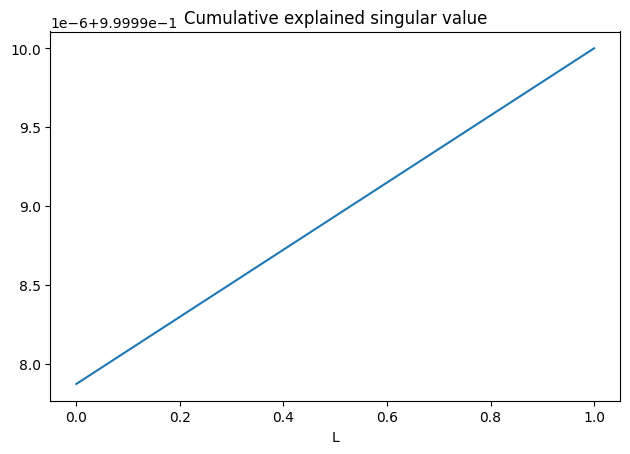

In [57]:
plt.figure()
plt.plot(np.cumsum(s)/s.sum())
plt.xlabel('L')
plt.title('Cumulative explained singular value')
plt.tight_layout()
plt.show()

## Truncated SVD in SKLearn

Truncated SVD  performs **linear  PCA**, a method of dimensionality reduction. Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently. We will explore the relationship between PCA and SVD later on. 

Some important parameters in `sklearn.decomposition.TruncatedSVD` that are worth noting:

- `n_components`: int, default=2; Desired dimensionality of output data. If algorithm=’arpack’, must be strictly less than the number of features. If algorithm=’randomized’, must be less than or equal to the number of features. The default value is useful for visualisation.

- `algorithm`: {‘arpack’, ‘randomized’}, default=’randomized’; SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to [Halko (2009)](https://arxiv.org/abs/0909.4061?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).

- `n_iter`: int, default=5; Number of iterations for randomized SVD solver. Not used by ARPACK. The default is larger than the default in [randomized_svd](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sklearn.utils.extmath.randomized_svd) to handle sparse matrices that may have large slowly decaying spectrum.

_Read more in the scikit-learn documentation of [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)._


First we create a ```TruncatedSVD``` object setting ```n_components=1``` this is analogous to ```L=1``` :


In [58]:
svd_ = TruncatedSVD(n_components=1, random_state=42)

```fit_transform```  behaves like the projections onto the principle components 


In [59]:
Z=svd_.fit_transform(X)
Z

array([[2.23606798],
       [4.47213595],
       [8.94436135]])

With `inverse_transform`, we can find the approximation of the original $X$:


In [60]:
Xhat=svd_.inverse_transform(Z)
Matrix(np.round(Xhat))

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

### Background Model using SVD

In this section you will use SVD for developing a Background Model. 

Background subtraction is a widely used approach to detect moving objects in a sequence of frames from static cameras. The base in this approach is detecting moving objects from the differences between the current frame and reference frame, which is often called 'Background Image' or 'Background Model'. 

The function ```get_data_Matrix```  will create a Design  matrix ```X``` where each row corresponds to a flattened image of a sidewalk with pedestrians recorded by a camera.

```Length``` and ```Width``` are the rectangular dimensions of the image. We will use SVD to remove the pedestrians: 


In [67]:
X,Length,Width=get_data_Matrix(mypath="peds")

In [68]:
X.shape, Length, Width

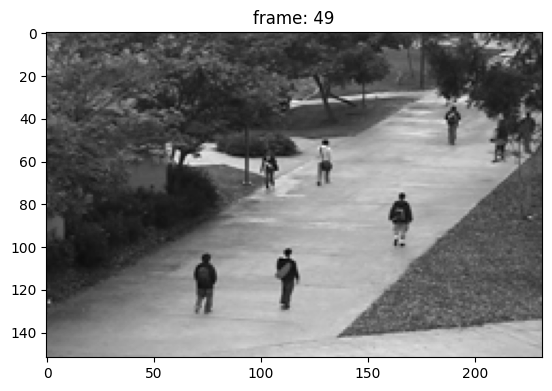

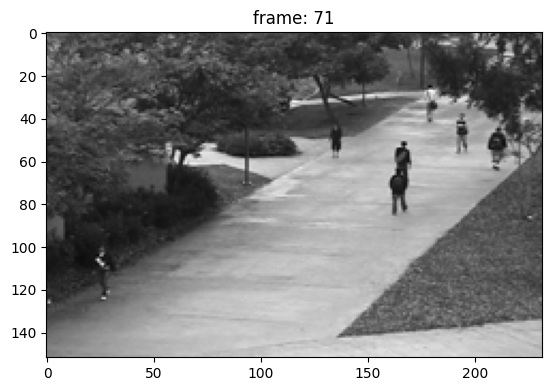

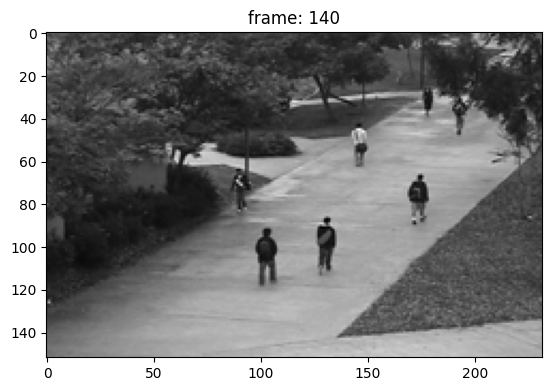

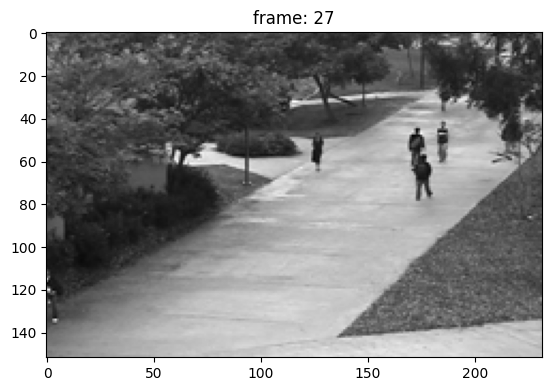

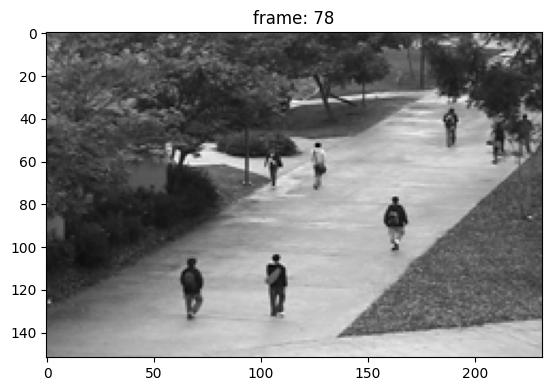

In [69]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

In [70]:
U, s, VT =svd(X, full_matrices=False)

In [71]:
S=np.diag(s)

We can reconstruct the image using Truncated SVD with ```L=1``` and assign the result to to ```Xhat```:

In [72]:
L=1
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]

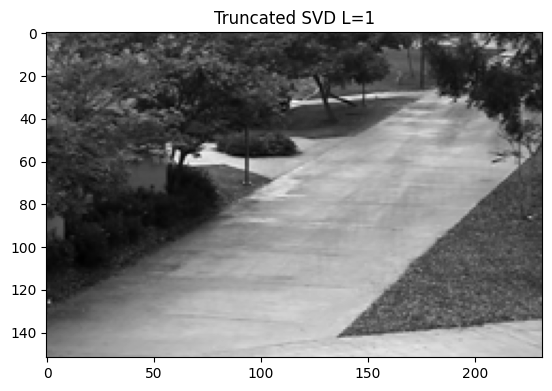

In [73]:
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Truncated SVD L=1')
plt.show()

## Exercises

Reshape the 5 random rows of ```Xhat``` and plot them as images.

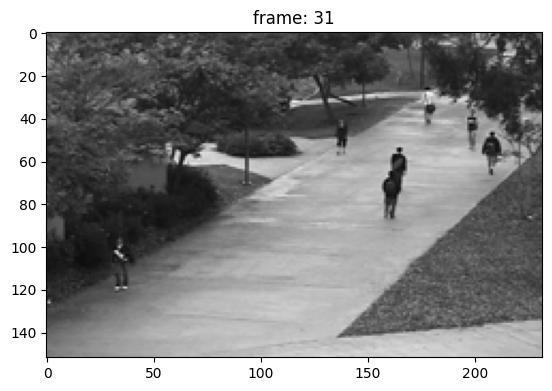

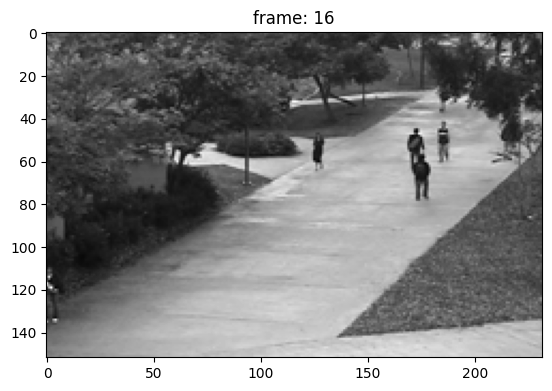

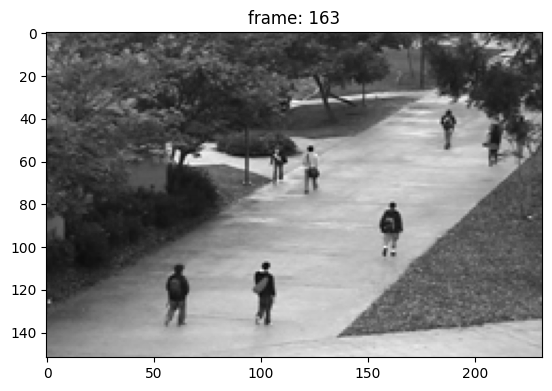

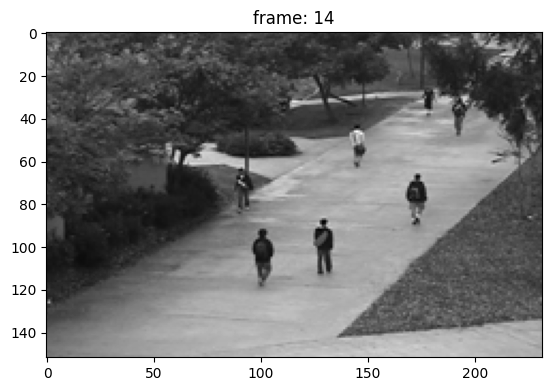

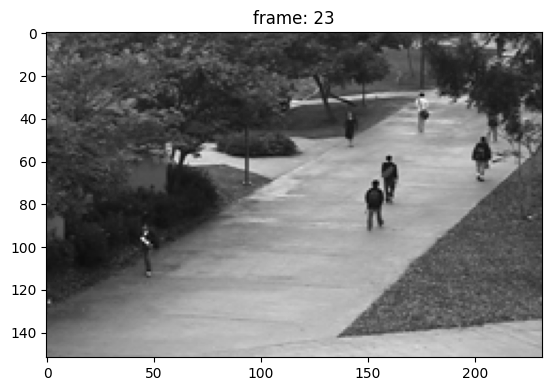

In [76]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

Plot the Cumulative explained variance against the number of singular values $L$.

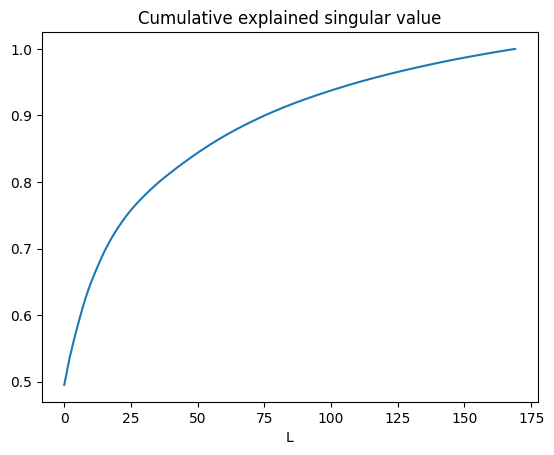

In [77]:
plt.plot(np.cumsum(s)/s.sum())
plt.xlabel('L')
plt.title('Cumulative explained singular value')
plt.show()

Perform Truncated SVD with L=10 and plot 5 random rows of Xhat.

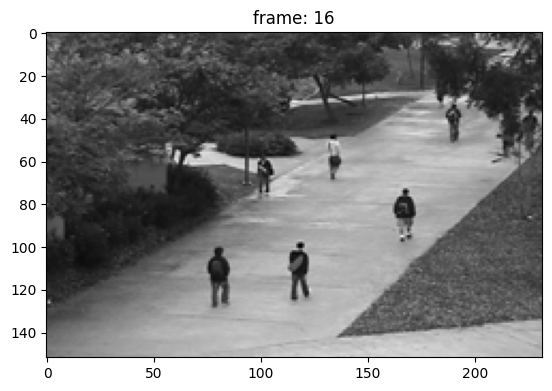

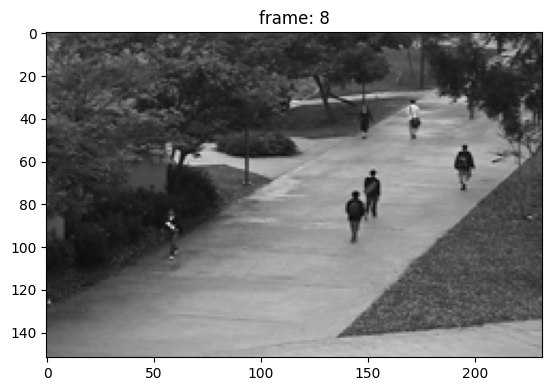

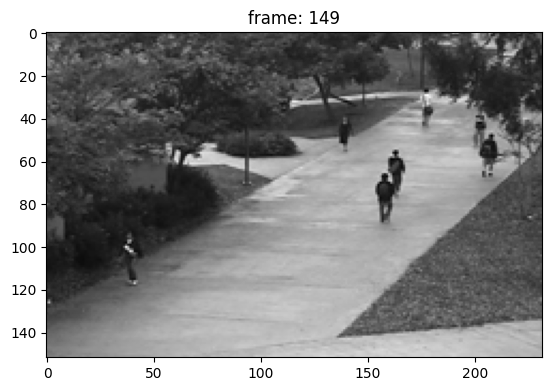

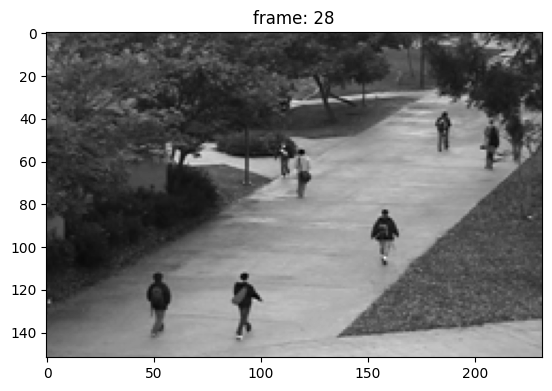

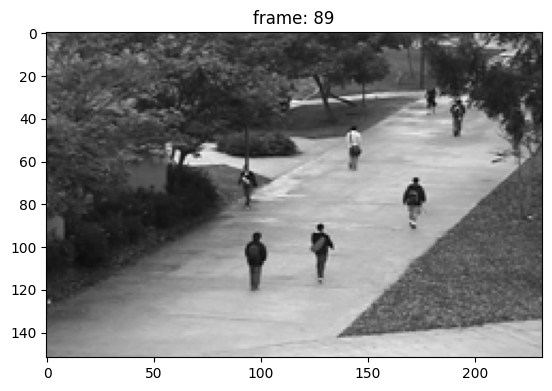

In [79]:
L=10
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

Apply   ```get_data_Matrix``` with ```mypath="traffic"```, plot 5 random images. Then perform Truncated SVD  using `TruncatedSVD` with ```n_components=1``` and plot the first row of ```Xhat``` as an image.

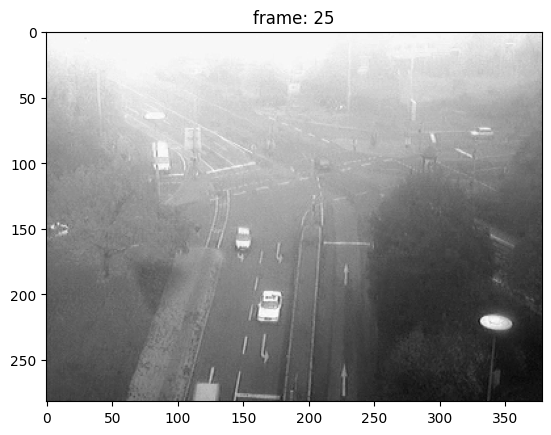

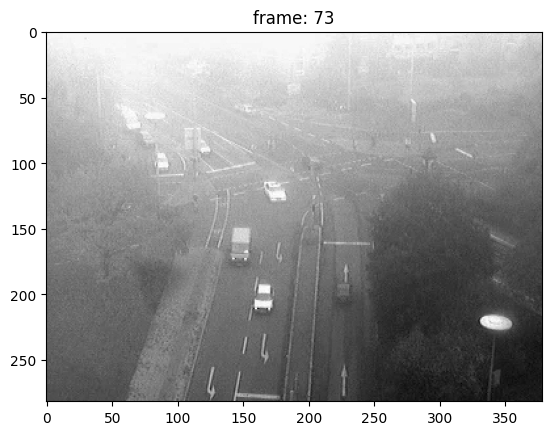

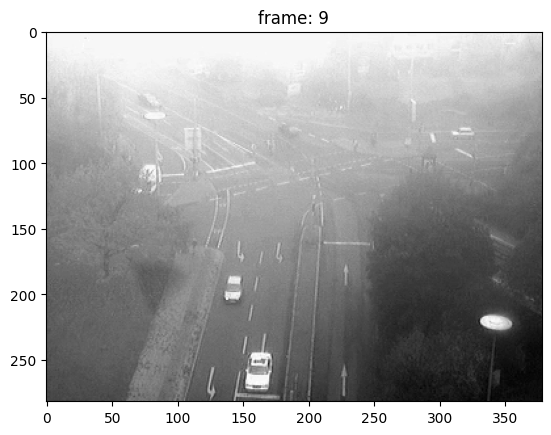

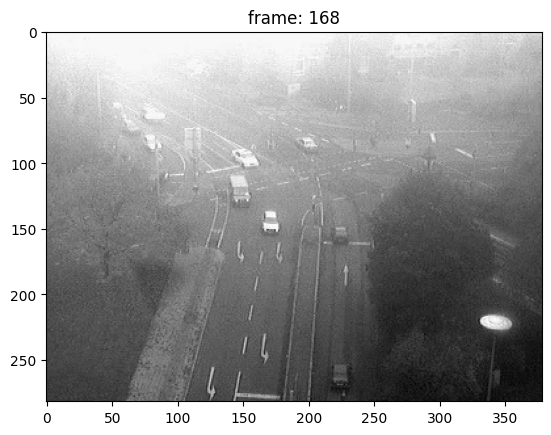

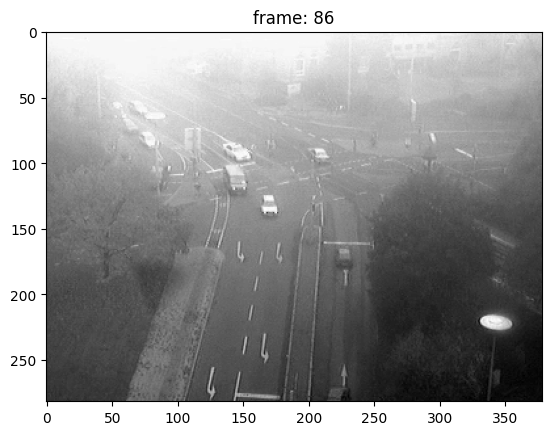

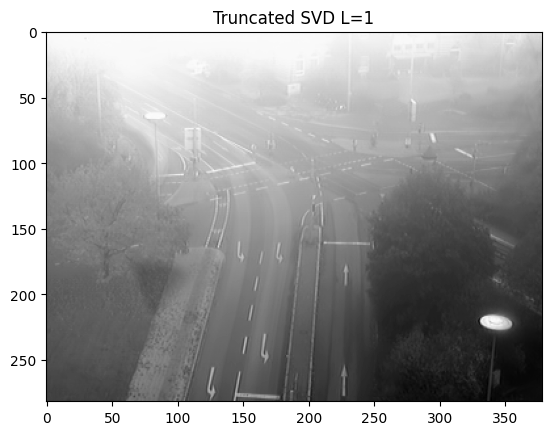

In [80]:
X,Length,Width=get_data_Matrix (mypath="traffic")

for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()
    
svd_ = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
score=svd_.fit_transform(X)
Xhat=svd_.inverse_transform(score)
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Truncated SVD L=1')

plt.show()
plt.show()